In [125]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image

In [126]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [127]:
img = image.load_img("C:/Users/tahme/Downloads/road/train/road/1.jpg")

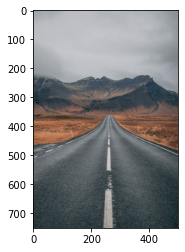

In [128]:
plt.imshow(img)

In [129]:
cv2.imread("C:/Users/tahme/Downloads/road/train/road/1.jpg").shape

(750, 500, 3)

In [130]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)


In [131]:
train_dataset = train.flow_from_directory('C:/Users/tahme/Downloads/road/train',
                                         target_size = (200,200),
                                         batch_size = 2,
                                         class_mode = 'binary')

validation_dataset = train.flow_from_directory('C:/Users/tahme/Downloads/road/validation',
                                         target_size = (200,200),
                                         batch_size = 2,
                                         class_mode = 'binary')

Found 60 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [132]:
train_dataset.class_indices

{'not road': 0, 'road': 1}

In [133]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [134]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])

In [135]:
model.compile(loss = "binary_crossentropy",
             optimizer = "adam",
             metrics = ['accuracy'])

In [136]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 5,
                     epochs = 2,
                     validation_data = validation_dataset)

Epoch 1/2
5/5 [==============================] - 2s 419ms/step - loss: 1.0992 - accuracy: 0.5000 - val_loss: 0.5985 - val_accuracy: 0.5714
Epoch 2/2
5/5 [==============================] - 2s 340ms/step - loss: 0.4979 - accuracy: 0.8000 - val_loss: 0.4654 - val_accuracy: 0.8571


In [137]:
model_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

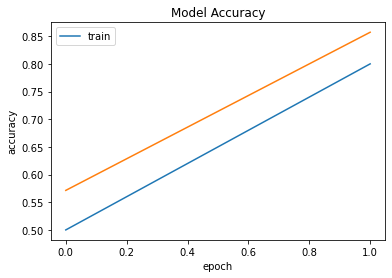

In [138]:
import matplotlib.pyplot as plt

plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc = 'upper left')
plt.show

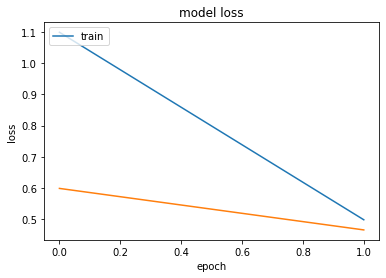

In [139]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()


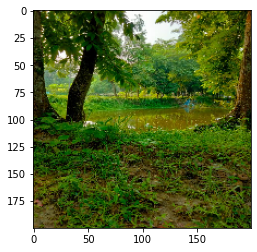

Not Road


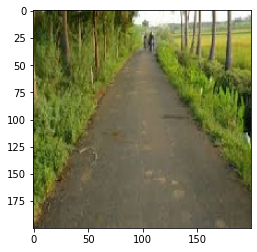

Road


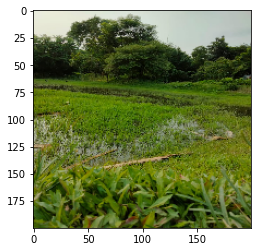

Not Road


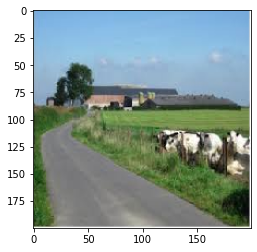

Road


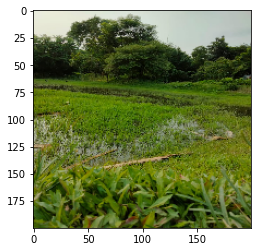

Not Road


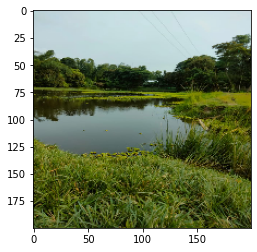

Road


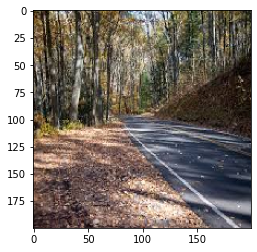

Not Road


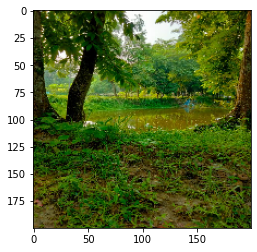

Not Road


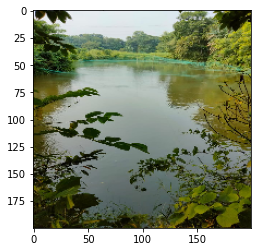

Road


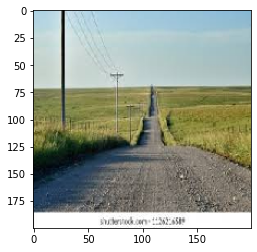

Road


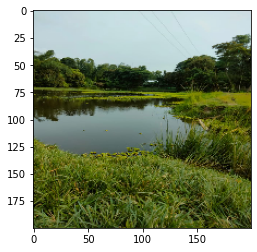

Road


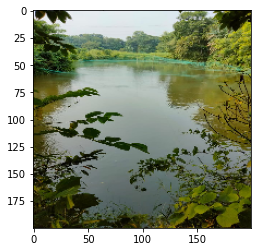

Road


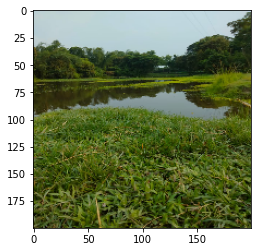

Not Road


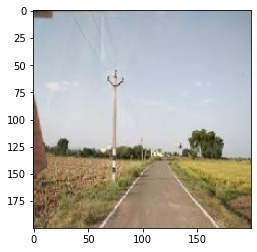

Road


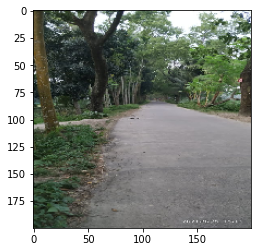

Road


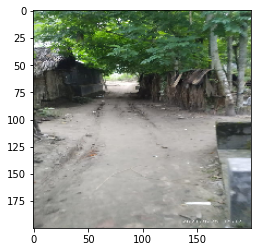

Not Road


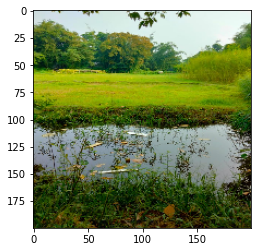

Not Road


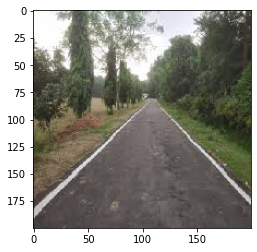

Road


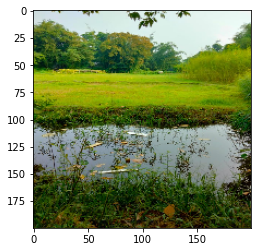

Not Road


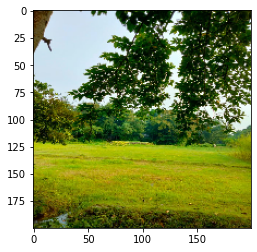

Not Road


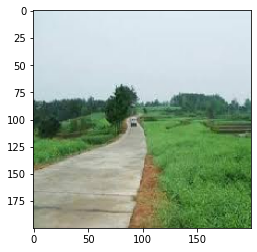

Road


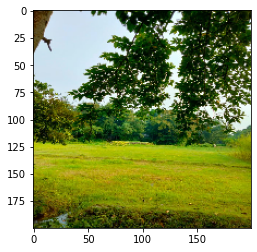

Not Road


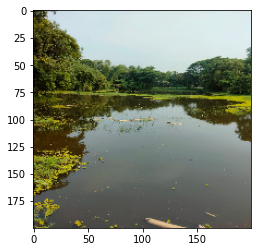

Road


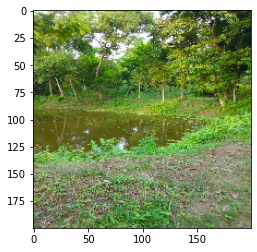

Not Road


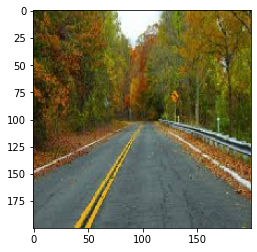

Not Road


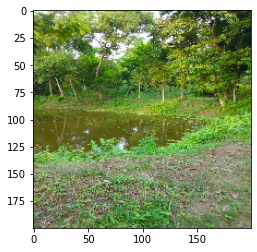

Not Road


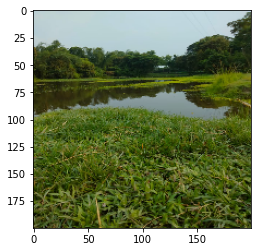

Not Road


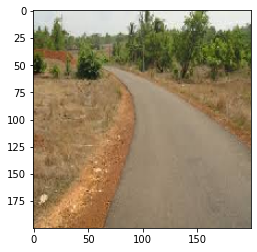

Road


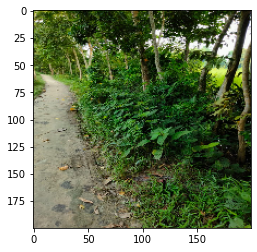

Not Road


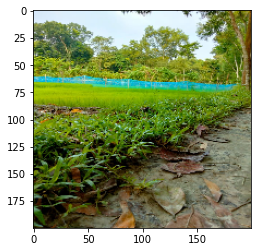

Not Road


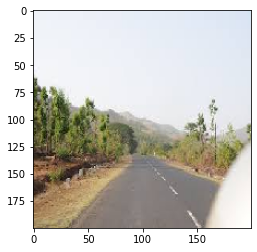

Road


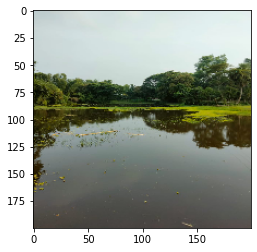

Road


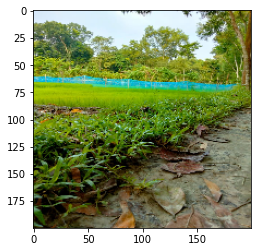

Not Road


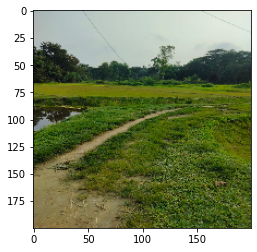

Road


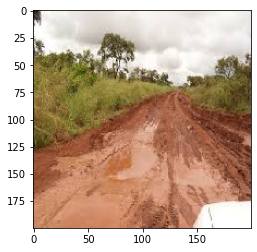

Road


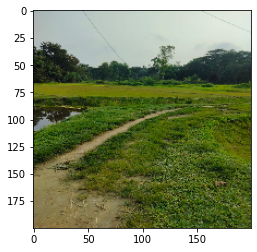

Road


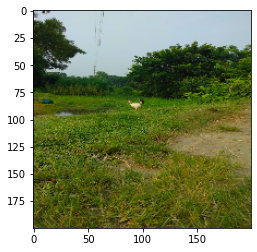

Not Road


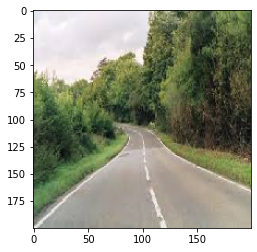

Road


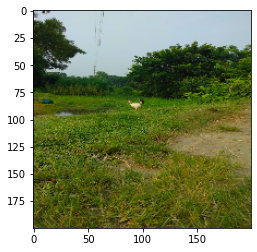

Not Road


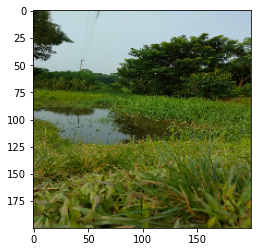

Not Road


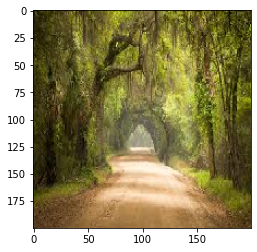

Not Road


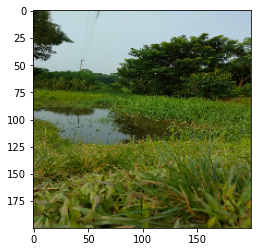

Not Road


In [140]:
dir_path = "C:/Users/tahme/Downloads/road/test"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path +'//'+i,target_size = (200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("Not Road")
    else:
        print("Road")
